In [383]:
# Modified Code From "Peters Morgan, Data Analysis from Scratch with Python First Edition,
# 2016, Ai Sciences Publisher, Chapter 12 Clustering"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sns as sns
from sklearn.cluster import KMeans

# NOTE !!!!
# Tidak di rekomendasikan untuk menjalankan file ini melalui IDLE
# Disarankan menggunakan versi Jupyter Notebook
# Karena PC saya terkena memory leak saat menjalankan kode dibawah secara langsung
#
# sklearn.cluster Traceback
# There is insufficient memory for the Java Runtime Environment to continue.
# Native memory allocation (malloc) failed to allocate 1369616 bytes for Chunk::new
#
# ?? out of memory?? how? consuming 64gb....

%matplotlib inline
# !Note only for Jupyter

# max_columns settings
# pd.set_option('display.max_columns', None)  # Unlimited
pd.reset_option('display.max_columns')

# Import JSON
dataset = pd.read_json('tenant_performance.json')
print(dataset.head(10))

         tenant_id  tenure  employee ownership  avg_num_visit  avg_promotion  \
0   12336009752852       2       3.0      rent       0.221944       0.637752   
1  359290056708112       4       NaN      rent       6.929247       0.403893   
2   13327005405727       3       2.0       own       9.100100       0.135532   
3   12336009545942       1       1.0       own       9.216673       0.421228   
4  359254061684940       4       2.0      rent       5.019374       0.267538   
5  359206051922227       1       1.0       own      12.772986       0.108748   
6   12336005164391       3       1.0       own       0.151258       1.678097   
7  358240052972783       4       NaN      rent       4.408272       0.813181   
8  353166051868547       1       3.0      rent      21.282887       2.481273   
9  351710053245014       1       1.0       own       0.111153       0.479717   

   avg_sales_call_duration  avg_visit_duration     revenue  
0                 1.150045            4.404288    3.513797

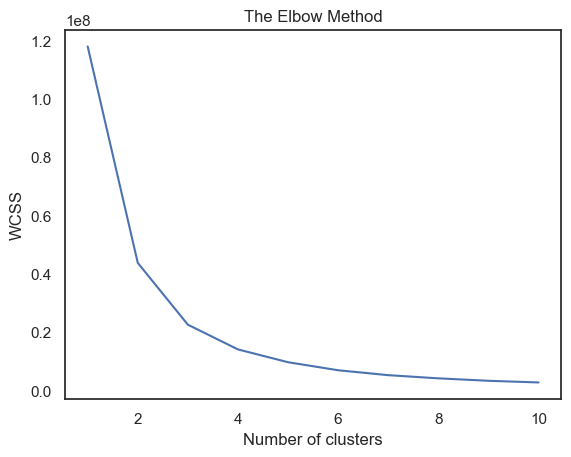

In [384]:
# Variable for clustering
# disable use loc so python 3.10 not BSOD
# X = dataset.iloc[:, [8, 5]].values
# X = dataset.iloc[:, [
#                         5,
#                         8,
#                     ]].values

X = dataset.loc[:, [
                     # 'tenant_id',
                     # 'tenure',
                     # 'employee',
                     # 'ownership',
                     # 'avg_num_visit',
                     'avg_promotion',
                     # 'avg_sales_call_duration',
                     # 'avg_visit_duration',
                     'revenue'
                   ]].values

# Calculate WCSS
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Centroid Values:
[[   1.18627745    1.1196827 ]
 [   1.19159101 -133.9231486 ]
 [   1.19043372  135.37576137]]


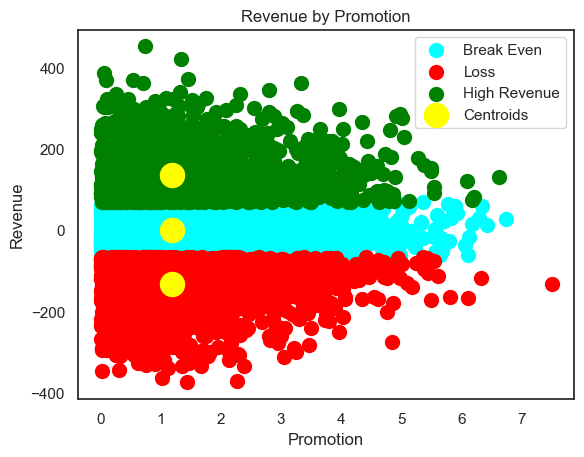

In [385]:
# K-Means clustering with n_clusters=3 from Elbow Method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
kmeans_predict = kmeans.fit_predict(X)

plt.scatter(X[kmeans_predict == 0, 0], X[kmeans_predict == 0, 1], s = 100, c = 'cyan', label = 'Break Even')
plt.scatter(X[kmeans_predict == 1, 0], X[kmeans_predict == 1, 1], s = 100, c = 'red', label = 'Loss')
plt.scatter(X[kmeans_predict == 2, 0], X[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'High Revenue')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',label = 'Centroids')

print("Centroid Values:")
print(kmeans.cluster_centers_)

plt.title('Revenue by Promotion')
plt.xlabel('Promotion')
plt.ylabel('Revenue')
plt.legend()
plt.show()

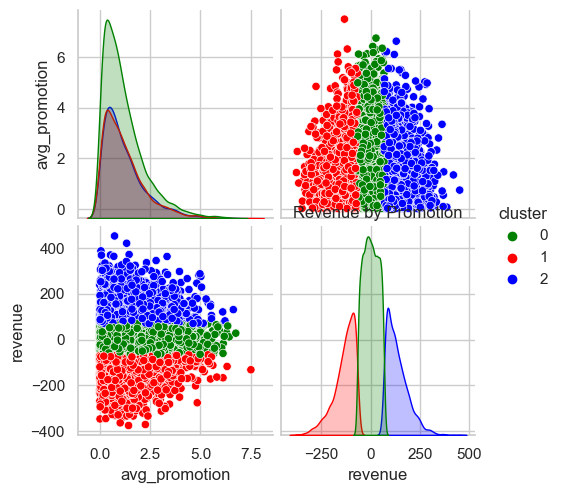

In [386]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Add kmeans to df dataset
dataset['cluster'] = kmeans_predict

sns.set(style="whitegrid")
cluster_labels = ["Break Even", "Loss", "High Revenue"]
sns.pairplot(data=dataset, hue="cluster", vars=['avg_promotion', 'revenue'], palette={0: 'green', 1: 'red', 2: 'blue'})
plt.title("Revenue by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Revenue")
plt.show()


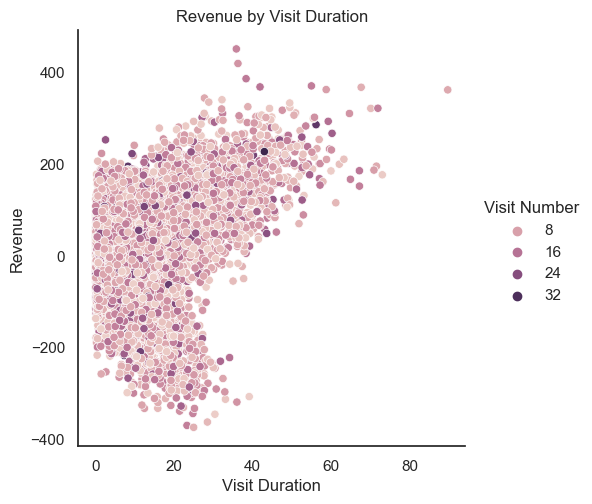

In [392]:
Relplot = sns.relplot(data=dataset, x="avg_visit_duration", y="revenue", hue="avg_num_visit")
plt.title("Revenue by Visit Duration")
plt.xlabel("Visit Duration")
plt.ylabel("Revenue")
Relplot._legend.set_title('Visit Number')
# note only using Relplot to add label to hue

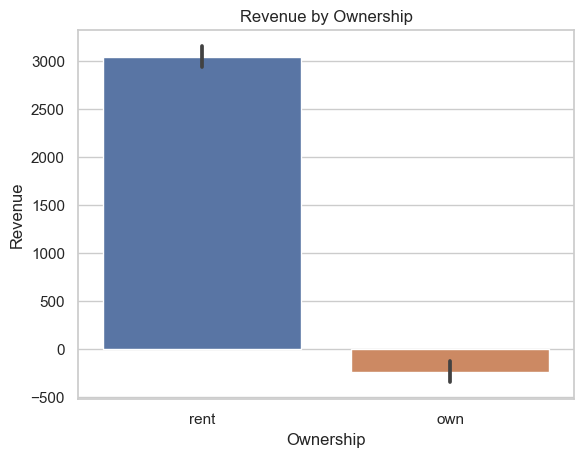

In [393]:

sns.set(style="whitegrid")
sns.barplot(data=dataset, x="ownership", y="revenue", estimator='sum', errorbar="sd")
plt.title("Revenue by Ownership")
plt.xlabel("Ownership")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# Simple Linear Regression "Joel Grus Version"
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

# scratch package cant be installed, change to DS Course code as base

# Create Prediction
def predict(alpha: float, beta: float, x_i: float) -> float:
  return beta * x_i + alpha

# compute pair error
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
  """
  The error from predicting beta * x_i + alpha
  when the actual value is y_i
  """
  return predict(alpha, beta, x_i) - y_i

# least squares solution
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
  return sum(error(alpha, beta, x_i, y_i) ** 2
             for x_i, y_i in zip(x, y))

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
  """
  Given two vectors x and y,
  find the least-squares values of alpha and beta
  """
  beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
  alpha = mean(y) - beta * mean(x)
  return alpha, beta
